In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve 
# from sklearn.utils import ConvergenceWarning 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import confusion_matrix 
import warnings 
warnings.filterwarnings('ignore')

#from sklearn import cross_validiation
from sklearn import tree
from sklearn import svm
from sklearn import ensemble 
from sklearn import neighbors 
from sklearn import linear_model 
from sklearn import metrics
from sklearn import preprocessing 
plt.style.use('fivethirtyeight')

# Good Looking Plots
import seaborn as sns
import statsmodels.api as sm 
from statsmodels.formula.api import logit,probit, poisson, ols
from sklearn import datasets




In [12]:
abalone_data_path = pd.read_csv("abalone.csv")

In [15]:
abalone_data_path.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


# Sex is either Male("M"), Female("F") or Infant ("I"), this is not suitable for regression algorithms, So I created a numeric feature : 1. Male, 2: Female, 3: Infant 

In [18]:
sex_dictionary={'M':1, 'F':2, 'I':3}
abalone_data_path['Sex'] = abalone_data_path['Sex'].apply(lambda x: sex_dictionary[x])

# Finding Data Types of all the variables

In [19]:
abalone_data_path.dtypes

Sex                 int64
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

# Finding the shape of datafreame 

In [20]:
print(abalone_data_path.shape)
print(abalone_data_path.columns)
#print(loan.describe())

(4177, 9)
Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')


# Getting Summery Metrics for the dataframe

In [21]:
print(abalone_data_path.describe())

               Sex       Length     Diameter       Height  Whole weight  \
count  4177.000000  4177.000000  4177.000000  4177.000000   4177.000000   
mean      1.955470     0.523992     0.407881     0.139516      0.828742   
std       0.827815     0.120093     0.099240     0.041827      0.490389   
min       1.000000     0.075000     0.055000     0.000000      0.002000   
25%       1.000000     0.450000     0.350000     0.115000      0.441500   
50%       2.000000     0.545000     0.425000     0.140000      0.799500   
75%       3.000000     0.615000     0.480000     0.165000      1.153000   
max       3.000000     0.815000     0.650000     1.130000      2.825500   

       Shucked weight  Viscera weight  Shell weight        Rings  
count     4177.000000     4177.000000   4177.000000  4177.000000  
mean         0.359367        0.180594      0.238831     9.933684  
std          0.221963        0.109614      0.139203     3.224169  
min          0.001000        0.000500      0.001500     

# Checking for missing/null values 

In [22]:
abalone_data_path.select_dtypes(include=['object']).isnull().sum()
abalone_data_path.select_dtypes(include=[np.number]).isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

# Adding Age range collumn in the dataframe for the classification. Age is classified based on the number of the rings. 


# Rings 1-8--> Age 1, denoting young 


# Rings 9-10--> Age 2, denoting middle


# Rings 11-29--> Age 3, denoting old 

In [23]:
def label_race(row):
    if row ['Rings']>=1 and row['Rings']<=8:
        return 1
    elif row['Rings']>9 and row['Rings']<=10:
        return 2
    elif row['Rings']>11 and row['Rings']<=29:
        return 3
    return 0

In [25]:
abalone_data_path['Age']= abalone_data_path.apply(lambda _:'',  axis=1)

In [26]:
abalone_data_path['Age']=abalone_data_path.apply(lambda row: label_race (row), axis=1)

In [28]:
abalone_data_path.Sex= abalone_data_path.Sex.astype(float)
abalone_data_path

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
0,1.0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,3
1,1.0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,1
2,2.0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,0
3,1.0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,2
4,3.0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,1
...,...,...,...,...,...,...,...,...,...,...
4172,2.0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,0
4173,1.0,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,2
4174,1.0,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,0
4175,2.0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,2


In [29]:
abalone_data_path[abalone_data_path['Height'] ==0]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
1257,3.0,0.430,0.34,0.0,0.428,0.2065,0.0860,0.1150,8,1
3996,3.0,0.315,0.23,0.0,0.134,0.0575,0.0285,0.3505,6,1


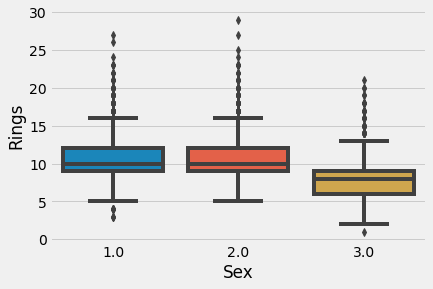

In [36]:
ax = sns.boxplot(x="Sex", y="Rings", data=abalone_data_path)
plt.show()

# Pairplot

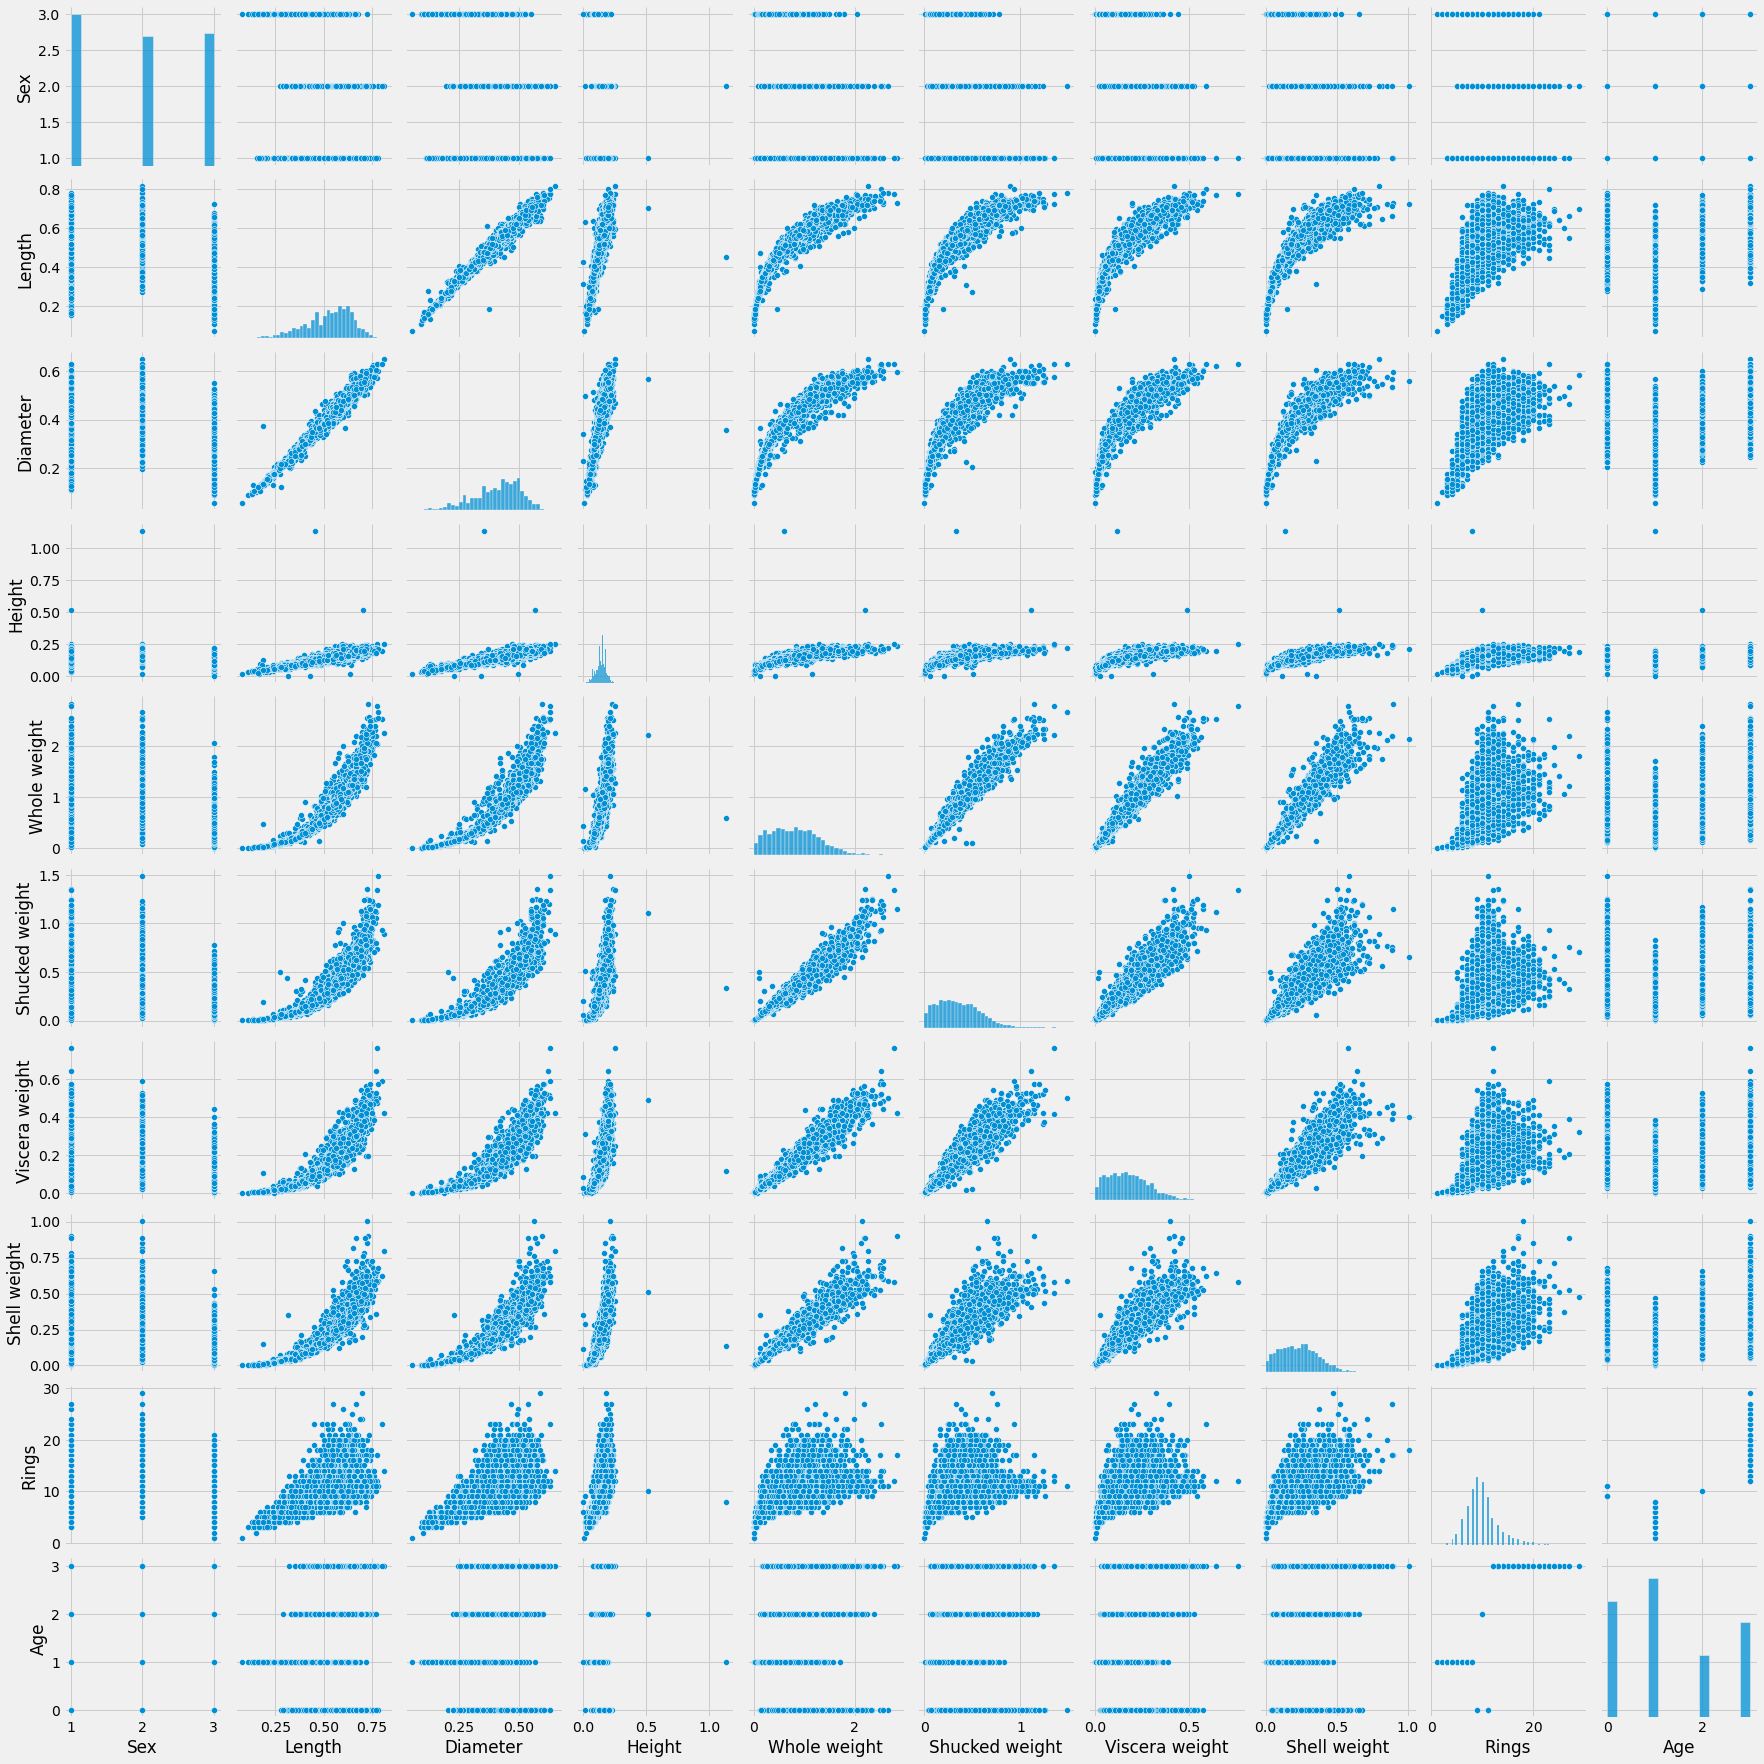

In [30]:
sns.pairplot(abalone_data_path)

# Heatmap

<AxesSubplot:>

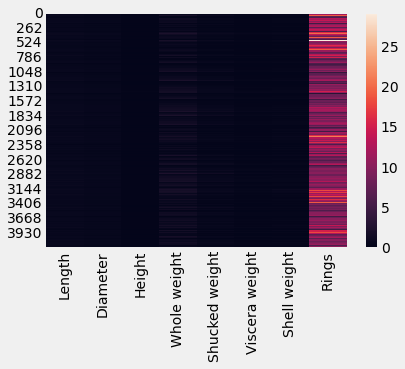

In [31]:
sns.heatmap(abalone_data_path[['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings']])

# Sex Value Checking 

In [32]:
abalone_data_path['Sex'].value_counts()

1.0    1528
3.0    1342
2.0    1307
Name: Sex, dtype: int64

# Infants have lower number of rings as compared to the Males and Females

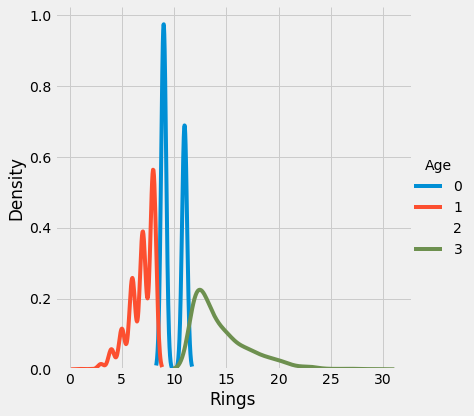

In [40]:
sns.FacetGrid(abalone_data_path, hue='Age', height=6)\
   .map(sns.kdeplot, "Rings")\
   .add_legend()
plt.show()

# Age Labelled 1 are youth, label 2 are middle aged and 3 are old aged, Young Abalones 0-10 rings, Middle aged Abalones have 9-11 rings and old Abalones have more than 10 rings

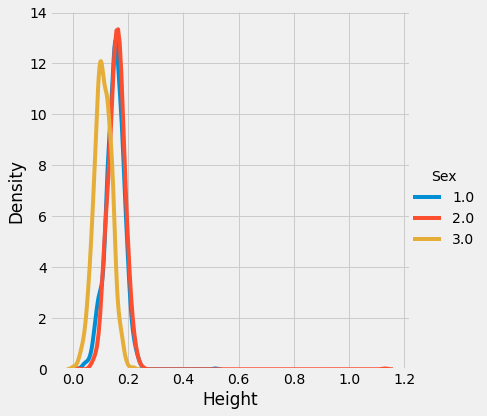

In [60]:
sns.FacetGrid(abalone_data_path, hue="Sex", height=6) \
   .map(sns.kdeplot, "Height") \
   .add_legend()
plt.show()

# Female abalones have more height than males and infants. Height of infants is between 0 to 0.3mm

Classification

Response variable is age


In [61]:
Y= abalone_data_path[['Age']]
Y

,Age
0,3
1,1
2,0
3,2
4,1
...,...
4172,0
4173,2
4174,0
4175,2


# Predictor variables obtained by dropping rings and age from the dataframe


In [62]:
X=abalone_data_path.drop(['Age','Rings'], axis=1)
X

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,1.0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,1.0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,2.0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,1.0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,3.0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...,...
4172,2.0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,1.0,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,1.0,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4175,2.0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960


In [73]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, Y) # splits 75%/25% by default

# Shape of training and testing data


In [74]:
print("train_abalone_data_path_x:")
print(train_X.shape)

print("train_abalone_data_path_y:")
print(train_y.shape)

print("test_abalone_data_path.drop_x:")
print(test_X.shape)

print("test_abalone_data_path.drop_y:")
print(test_y.shape)

train_abalone_data_path_x:
(3132, 8)
train_abalone_data_path_y:
(3132, 1)
test_abalone_data_path.drop_x:
(1045, 8)
test_abalone_data_path.drop_y:
(1045, 1)


In [75]:
def getAccuracy(testSet, predictions):

    correct = 0

    for x in range(len(testSet)):

        if testSet[x][-1] == predictions[x]:

            correct += 1

    return (correct/float(len(testSet))) * 100.0

# Ploting a hue plot ( Rings Vs Length and Sex)

Text(0.5, 1.0, 'Ring Vs Length and Sex')

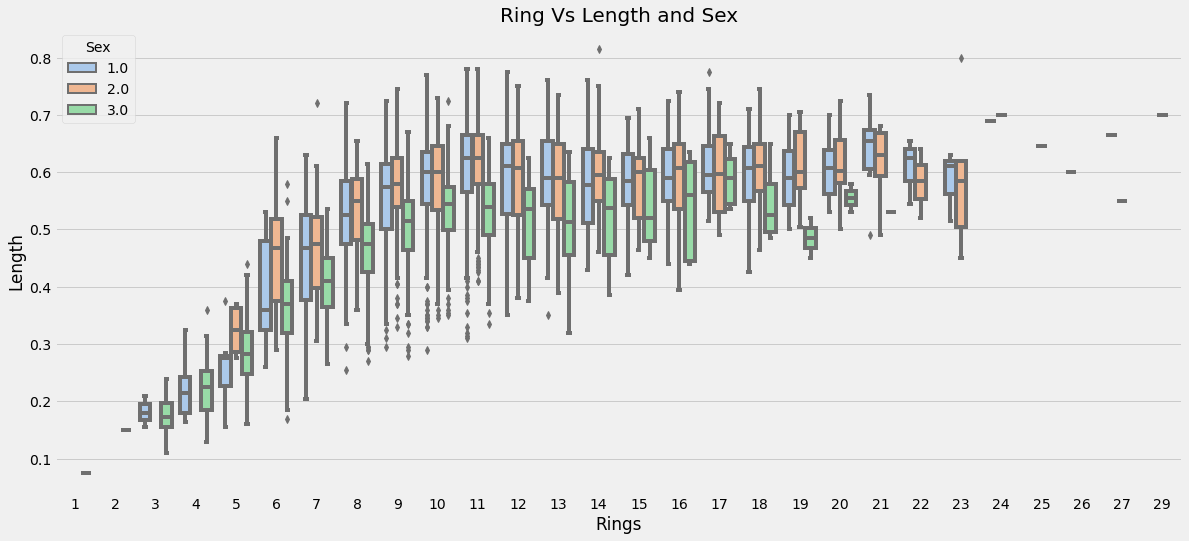

In [41]:
plt.rcParams['figure.figsize']=(18,8)
sns.boxplot(abalone_data_path["Rings"], abalone_data_path['Length'], hue= abalone_data_path['Sex'], palette='pastel')
plt.title('Ring Vs Length and Sex', fontsize= 20)

# Ring Vs Diameter and Sex

Text(0.5, 1.0, 'Rings Vs Diameter and Sex')

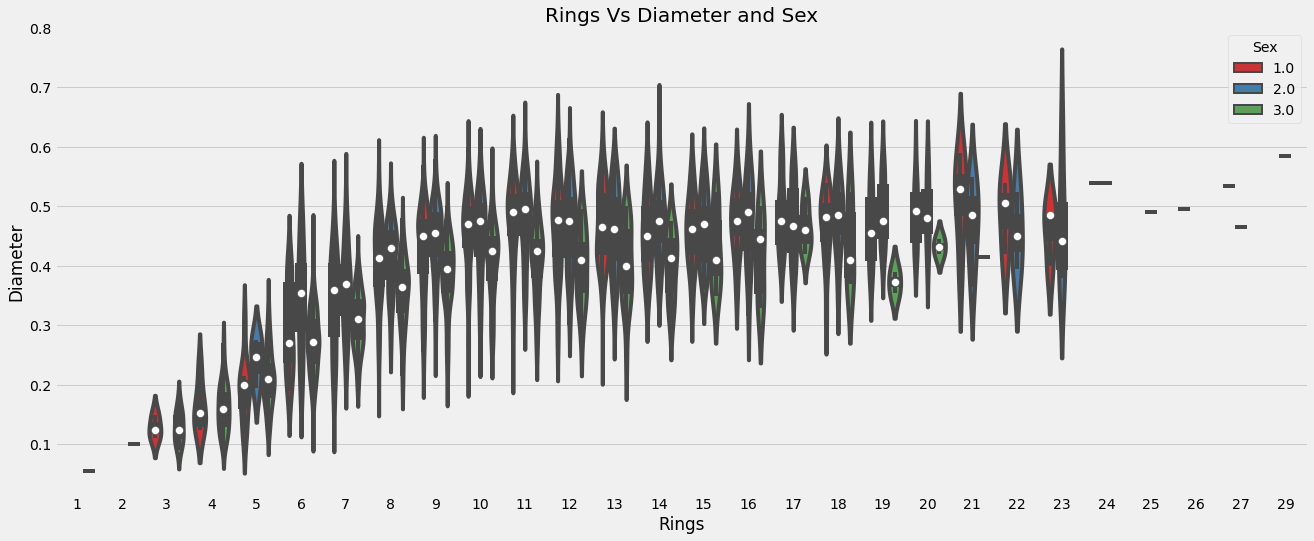

In [42]:
plt.rcParams['figure.figsize']= (20,8)
sns.violinplot(abalone_data_path['Rings'], abalone_data_path['Diameter'], hue=abalone_data_path['Sex'], palette= 'Set1')
plt.title('Rings Vs Diameter and Sex', fontsize = 20)

# Rings Vs Weight

Text(0.5, 1.0, 'Rings vs weight')

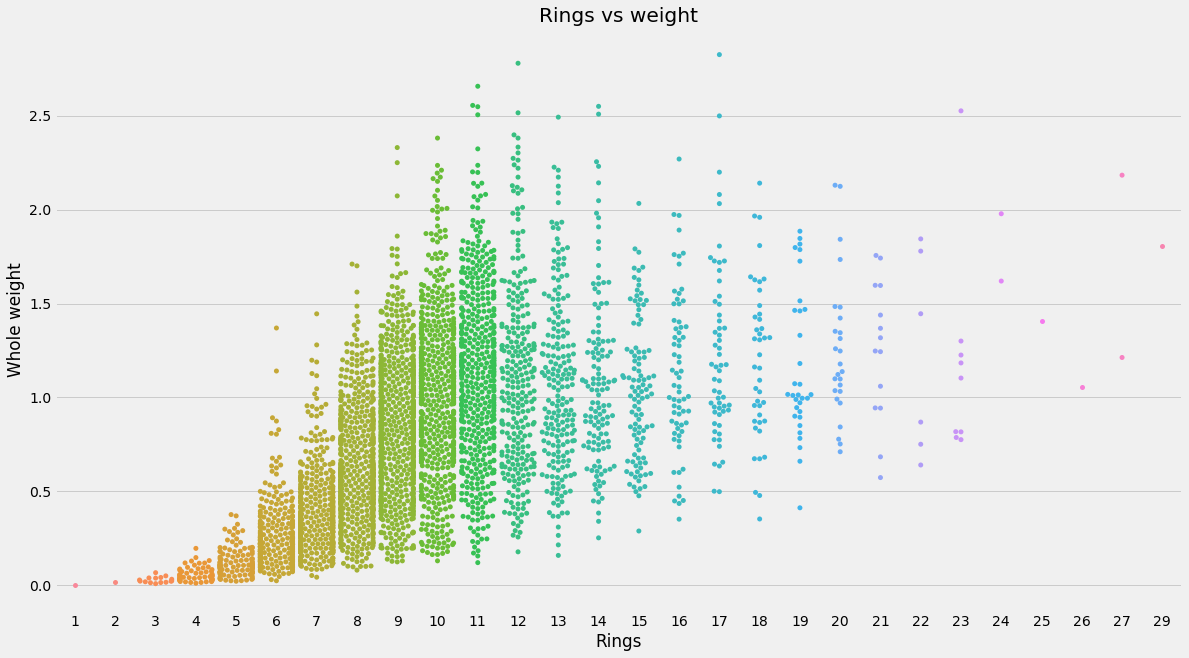

In [55]:
plt.rcParams['figure.figsize'] = (18, 10)
sns.swarmplot(abalone_data_path['Rings'], abalone_data_path['Whole weight'])
plt.title('Rings vs weight')

# Ring vs shucked weight

Text(0.5, 1.0, 'Rings vs shucked weight')

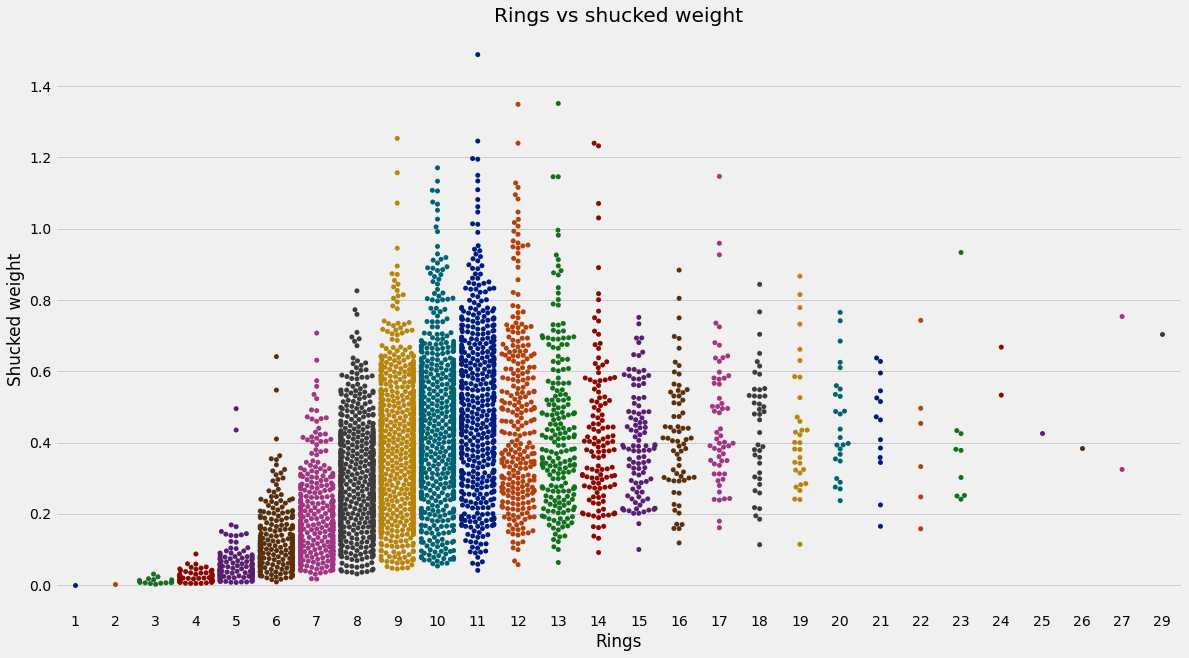

In [56]:


plt.rcParams['figure.figsize'] = (18, 10)
sns.swarmplot(abalone_data_path['Rings'], abalone_data_path['Shucked weight'], palette = 'dark')
plt.title('Rings vs shucked weight')

# Ring vs viscera weight

Text(0.5, 1.0, 'Rings vs Viscera Weight')

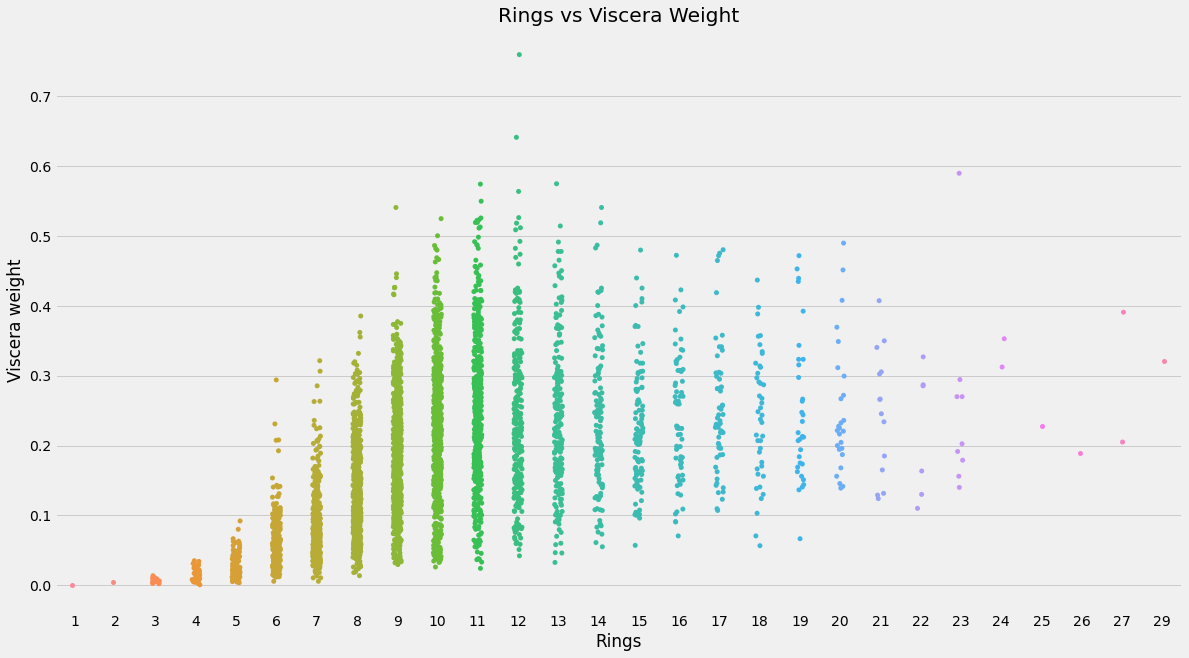

In [57]:


plt.rcParams['figure.figsize'] = (18, 10)
sns.stripplot(abalone_data_path['Rings'], abalone_data_path['Viscera weight'])
plt.title('Rings vs Viscera Weight')

# Ring vs Shell weight

Text(0.5, 1.0, 'Rings vs Shell weight')

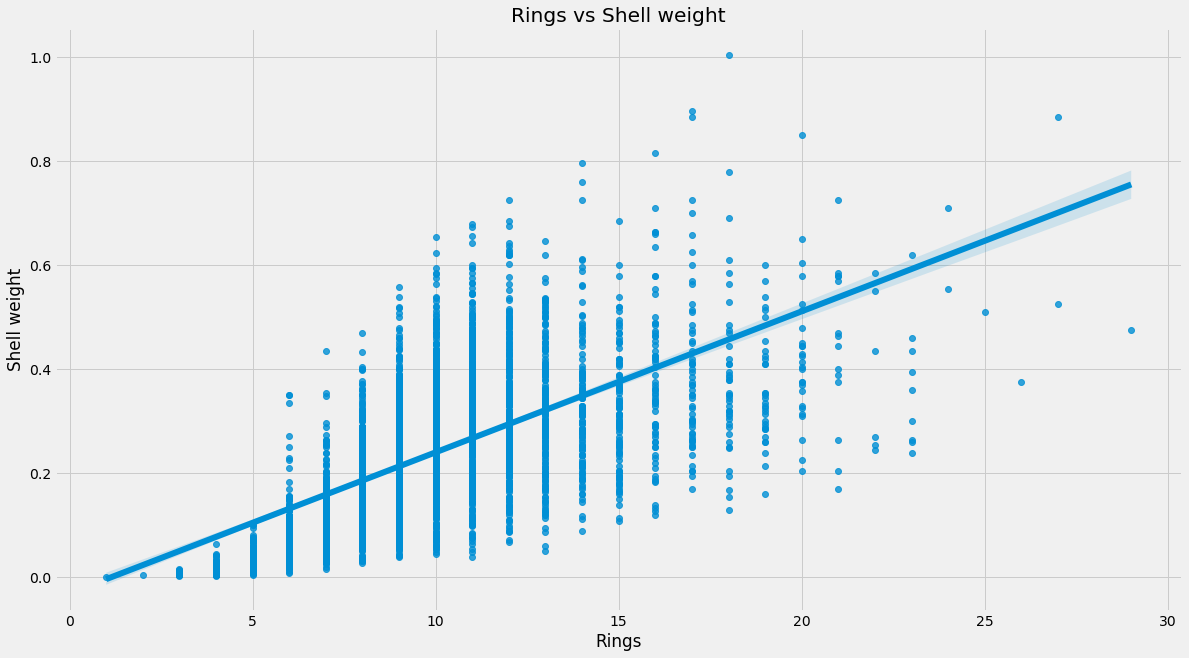

In [58]:


plt.rcParams['figure.figsize'] = (18, 10)
sns.regplot(abalone_data_path['Rings'], abalone_data_path['Shell weight'])
plt.title('Rings vs Shell weight')

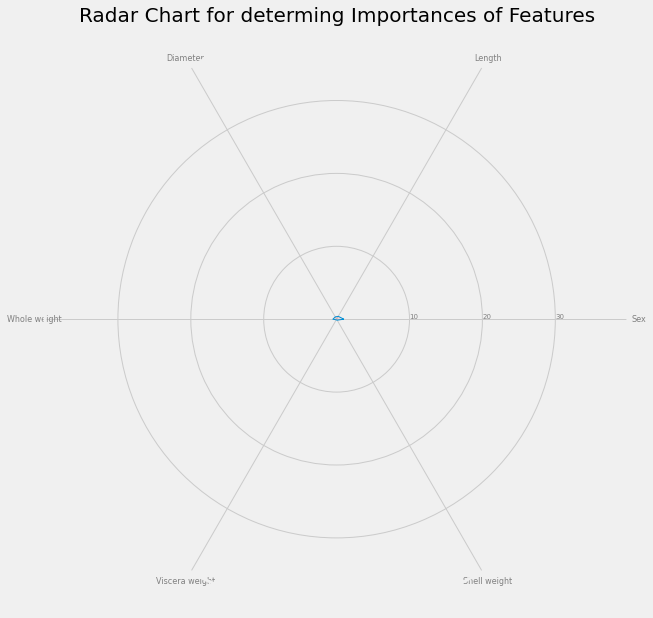

In [78]:
from math import pi

# Set data
abalone_data_path = pd.DataFrame({
'group': [i for i in range(0, 4177)],
'Sex': abalone_data_path['Sex'],
'Length': abalone_data_path['Length'],
'Diameter': abalone_data_path['Diameter'],
'Whole weight':  abalone_data_path['Whole weight'],
'Viscera weight': abalone_data_path['Viscera weight'],
'Shell weight': abalone_data_path['Shell weight']
})
 
# number of variable
categories=list(abalone_data_path)[1:]
N = len(categories)
 
# We are going to plot the first line of the data frame.
# But we need to repeat the first value to close the circular graph:
values = abalone_data_path.loc[0].drop('group').values.flatten().tolist()
values += values[:1]
values
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories, color='grey', size=8)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([10,20,30], ["10","20","30"], color="grey", size=7)
plt.ylim(0,40)
 
# Plot data
ax.plot(angles, values, linewidth=1, linestyle='solid')
plt.title('Radar Chart for determing Importances of Features', fontsize = 20) 
# Fill area
ax.fill(angles, values, 'red', alpha=0.1)


# Logistic Regression

In [79]:
import statsmodels.api as sm
from sklearn.metrics import accuracy_score
import math
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_squared_error

#logistic regression
log_reg = LogisticRegression(multi_class='multinomial',solver ='newton-cg')
log_reg.fit(train_X, train_y)
print ("Intercept is ",log_reg.intercept_)
print("Coefficient is ",log_reg.coef_)
y_pred=log_reg.predict(test_X) 

Intercept is  [-0.94536551  2.90894146 -1.08051698 -0.88305897]
Coefficient is  [[-7.24523121e-03  1.51024690e+00  1.10244788e+00 -3.43040150e-01
  -7.86209980e-01  2.10733684e+00  1.02663427e+00 -6.81747858e-01]
 [ 4.05654512e-01 -1.84485773e+00 -2.21094186e+00 -1.36351133e+00
  -2.44046142e+00  4.68709953e+00 -6.98434479e-01 -5.12112187e+00]
 [-2.02572123e-01  1.08247565e+00  7.74240284e-01  2.64346114e-01
  -9.90147469e-02  6.90991826e-01  4.93960023e-01  1.55418568e-01]
 [-1.95837157e-01 -7.47864824e-01  3.34253697e-01  1.44220537e+00
   3.32568615e+00 -7.48542820e+00 -8.22159816e-01  5.64745116e+00]]


In [80]:
#calculate Confusion Matrix

print("Confusion Matrix: ")
confusion_matrix(test_y, y_pred)

Confusion Matrix: 


array([[168,  79,   0,  64],
       [ 71, 273,   0,   3],
       [ 97,  27,   0,  33],
       [ 54,  34,   0, 142]], dtype=int64)

In [81]:
print("Accuracy of Logistic Regression is:")
print(accuracy_score(test_y, y_pred)*100)

Accuracy of Logistic Regression is:
55.78947368421052


In [82]:
#Mean Absolute Error 
mae=mean_absolute_error(test_y,y_pred);
print("MAE:"+str(mae))

MAE:0.7961722488038278


In [83]:
#RMSE 
rmse = math.sqrt(mean_squared_error(test_y,y_pred))
print("RMSE:"+str(rmse))

RMSE:1.3153492086399932


In [84]:
print("Classification report for Test data %s:\n%s\n\n"
     % (log_reg, metrics.classification_report(test_y, y_pred)))

Classification report for Test data LogisticRegression(multi_class='multinomial', solver='newton-cg'):
              precision    recall  f1-score   support

           0       0.43      0.54      0.48       311
           1       0.66      0.79      0.72       347
           2       0.00      0.00      0.00       157
           3       0.59      0.62      0.60       230

    accuracy                           0.56      1045
   macro avg       0.42      0.49      0.45      1045
weighted avg       0.48      0.56      0.51      1045





In [85]:
def confusion_matrix_data(conf_matrix):
    fix, ax = plt.subplots(figsize=(16, 12))
    plt.suptitle('Confusion Matrix  on Data Set')
    for ii, values in conf_matrix.items():
        matrix = values['matrix']
        title = values['title']
        plt.subplot(2, 2, ii) # starts from 1
        plt.title(title);
        sns.heatmap(matrix, annot=True,  fmt='');

# Neural Networks

In [86]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
#neural network
scaler = StandardScaler()
# Fit only to the training data
scaler.fit(train_X)
train_X = scaler.transform(train_X)
test_X = scaler.transform(test_X)

neural_network_class=MLPClassifier(hidden_layer_sizes=(20,10,20))
neural_network_class.fit(train_X,train_y)
predictions = neural_network_class.predict(test_X)
y_pred=predictions

#calculate ROC curve
#preds = neural_network_class.predict_proba(test_X)[:,1]
#calculate_roc_curve(test_y, y_pred,3)


#calculate Confusion Matrix
print("Confusion Matrix")
confusion_matrix(test_y, y_pred)

Confusion Matrix


array([[177,  66,   0,  68],
       [ 68, 270,   0,   9],
       [100,  19,   0,  38],
       [ 58,  11,   0, 161]], dtype=int64)

In [87]:
print("Accuracy of Neural Networks is")
print(accuracy_score(test_y, y_pred)*100)

Accuracy of Neural Networks is
58.18181818181818


In [88]:
#Mean Absolute Error 
mae=mean_absolute_error(test_y,y_pred);
print("MAE:"+str(mae))

MAE:0.7741626794258373


In [89]:
#RMSE 
rmse = math.sqrt(mean_squared_error(test_y,y_pred))
print("RMSE:"+str(rmse))

RMSE:1.3142574813455419


In [90]:
print("Classification report for Test data %s:\n%s\n\n"
     % (scaler, metrics.classification_report(test_y, y_pred)))

Classification report for Test data StandardScaler():
              precision    recall  f1-score   support

           0       0.44      0.57      0.50       311
           1       0.74      0.78      0.76       347
           2       0.00      0.00      0.00       157
           3       0.58      0.70      0.64       230

    accuracy                           0.58      1045
   macro avg       0.44      0.51      0.47      1045
weighted avg       0.50      0.58      0.54      1045





# Random Forest

In [91]:
from sklearn.metrics import confusion_matrix
#Random Forest
rf = RandomForestClassifier(n_jobs=2)
rf.fit(train_X, train_y)
preds = rf.predict_proba(test_X)[:,1]
y_pred=rf.predict(test_X)
#calculate ROC curve
#calculate_roc_curve(y_test, y_pred,2) 


#calculate Confusion Matrix
print("Confusion Matrix")
confusion_matrix(test_y, y_pred)

Confusion Matrix


array([[145,  75,  33,  58],
       [ 62, 268,  10,   7],
       [ 84,  21,  19,  33],
       [ 63,  16,  17, 134]], dtype=int64)

In [92]:
print("Accuracy of Random Forest is:")
print(accuracy_score(test_y, y_pred)*100)

Accuracy of Random Forest is:
54.162679425837325


In [93]:
#Mean Absolute Error 
mae=mean_absolute_error(test_y,y_pred);
print("MAE:"+str(mae))

MAE:0.8239234449760765


In [96]:
# #RMSE 
rmse = math.sqrt(mean_squared_error(test_y,y_pred))
print("RMSE:"+str(rmse)) 

RMSE:1.3366386463114843


In [95]:
print("Classification report for Test data %s:\n%s\n\n"
     % (rf, metrics.classification_report(test_y, y_pred)))

Classification report for Test data RandomForestClassifier(n_jobs=2):
              precision    recall  f1-score   support

           0       0.41      0.47      0.44       311
           1       0.71      0.77      0.74       347
           2       0.24      0.12      0.16       157
           3       0.58      0.58      0.58       230

    accuracy                           0.54      1045
   macro avg       0.48      0.49      0.48      1045
weighted avg       0.52      0.54      0.53      1045





# KNN Classifier

In [97]:
# Create an instance of KNeighborsClassifier and then fit training data
from sklearn import neighbors
clf = neighbors.KNeighborsClassifier()
clf.fit(train_X,train_y)
# Make class predictions for all observations in X
y_pred = clf.predict(test_X)

#calculate Confusion Matrix
print("Confusion Matrix")
confusion_matrix(test_y, y_pred)

Confusion Matrix


array([[157,  57,  50,  47],
       [ 82, 246,  10,   9],
       [ 93,  17,  27,  20],
       [ 80,  21,  24, 105]], dtype=int64)

In [98]:
print("Accuracy of KNN Classifier is:")
print(accuracy_score(test_y, y_pred)*100)

#Mean Absolute Error 

mae=mean_absolute_error(test_y,y_pred);
print("MAE:"+str(mae))

Accuracy of KNN Classifier is:
51.196172248803826
MAE:0.8966507177033493


In [99]:
#RMSE 
rmse = math.sqrt(mean_squared_error(test_y,y_pred))
print("RMSE:"+str(rmse))

RMSE:1.3989059293044197


In [100]:
print("Classification report for Test data %s:\n%s\n\n"
     % (clf, metrics.classification_report(test_y, y_pred)))

Classification report for Test data KNeighborsClassifier():
              precision    recall  f1-score   support

           0       0.38      0.50      0.43       311
           1       0.72      0.71      0.72       347
           2       0.24      0.17      0.20       157
           3       0.58      0.46      0.51       230

    accuracy                           0.51      1045
   macro avg       0.48      0.46      0.47      1045
weighted avg       0.52      0.51      0.51      1045





# Conclusion

Logistic Regression
Accuracy : 64.7846889952
Root mean square error(RMSE): 0.6958523739384593
Mean Absolute error(MAE): 0.39617224880382773

Neural Network
Accuracy : 68.7081339712
Root mean square error(RMSE): 0.6407232755171874
Mean Absolute error(MAE): 0.34545454545454546

Random Forest
Accuracy : 65.2631578947
Root mean square error(RMSE): 0.6777389936698861
Mean Absolute error(MAE): 0.384688995215311
KNN Classifier

Accuracy :61.5311004784
Root mean square error(RMSE): 0.7108186533109109
Mean Absolute error(MAE): 0.42488038277511964
    
Conclusion: Neural network gives highest accuracy for classification of age data among all the 4 models, depending on rmse value of 0.6407 which is lowest.